In [1]:
import pandas as pd

In [7]:
lynx_df = pd.read_csv("LYNXdata.csv", header = 0, names = ['year', 'trappings'], index_col = 0)

In [8]:
lynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [14]:
# Converting the DataFrame into a Series Object

# Generate new index
new_lynx_df = pd.Series(lynx_df['trappings'].values, 
                        index = pd.date_range('31/12/1821', 
                        periods = 114, freq = 'A-DEC'))

In [16]:
new_lynx_df.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [12]:
pd.date_range('31/12/1821', periods = 114, freq = 'A-DEC')

DatetimeIndex(['1821-12-31', '1822-12-31', '1823-12-31', '1824-12-31',
               '1825-12-31', '1826-12-31', '1827-12-31', '1828-12-31',
               '1829-12-31', '1830-12-31',
               ...
               '1925-12-31', '1926-12-31', '1927-12-31', '1928-12-31',
               '1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31'],
              dtype='datetime64[ns]', length=114, freq='A-DEC')

### Plot Autocorrelation

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

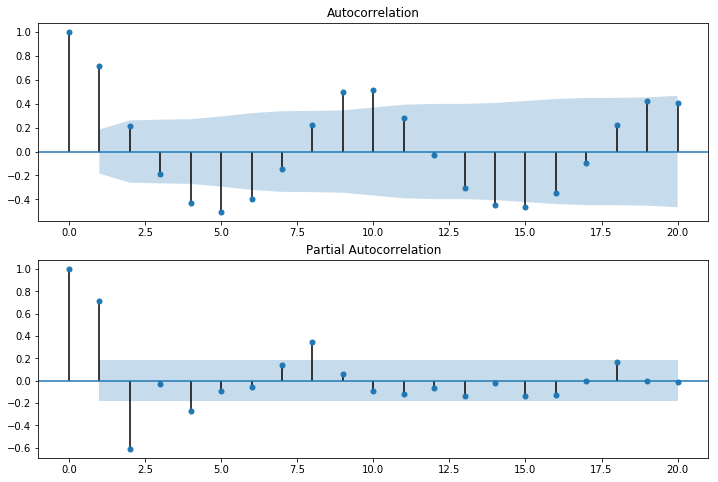

In [22]:
# set 2 plots in one sheet
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(new_lynx_df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(new_lynx_df, lags=20, ax=ax2)


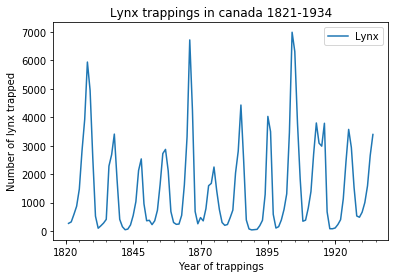

In [23]:
new_lynx_df.plot()
plt.title('Lynx trappings in canada 1821-1934')
plt.xlabel('Year of trappings')
plt.ylabel('Number of lynx trapped')
plt.legend(['Lynx'])

In [24]:
import numpy as np

In [26]:
cumsum_lynx = np.cumsum(new_lynx_df)

In [27]:
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

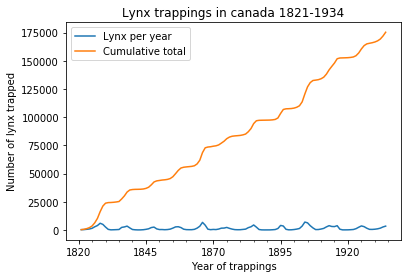

In [28]:
new_lynx_df.plot()
cumsum_lynx.plot()
plt.title('Lynx trappings in canada 1821-1934')
plt.xlabel('Year of trappings')
plt.ylabel('Number of lynx trapped')
plt.legend(['Lynx per year', 'Cumulative total'])

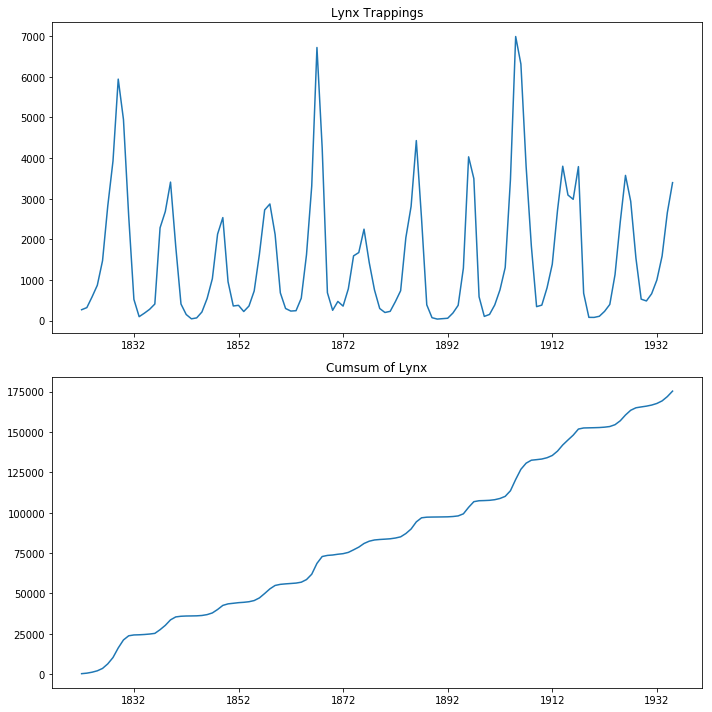

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(new_lynx_df)
plt.title('Lynx Trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

In [30]:
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize=(12,8))
    og = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation (window =' +str(window)+')')
    plt.show()

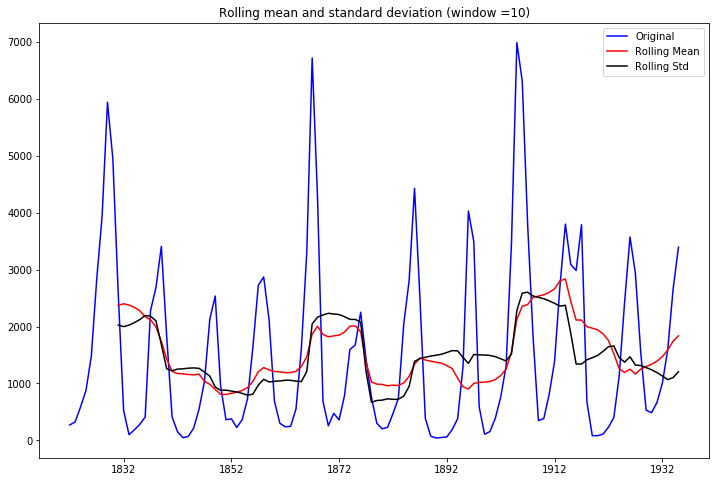

In [32]:
plot_rolling(new_lynx_df,10)

In [35]:
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()
    
    fig = plt.figure(figsize=(12,8))
    og_line = plt.plot(timeseries, color='blue', label='Original')
    exwm_line = plt.plot(expw_ma, color='red', label='EWMA')
    plt.legend(loc='best')
    plt.title('EWMA (alpha= ' + str(alpha) + ')')
    plt.show()

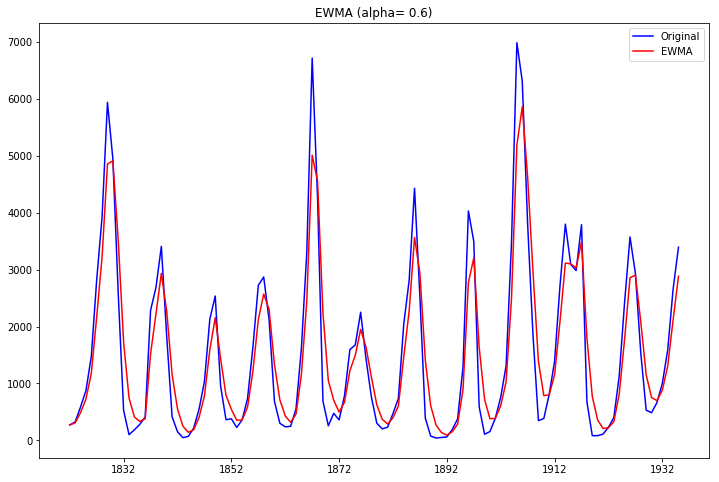

In [39]:
plot_ewma(new_lynx_df, 0.6)